deleting peaks from pklist if within mask 

useful for testing of new code in `fringeprocess.py`

In [34]:
from PIL import Image, ImageDraw
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [35]:
from ls_fringeapp import fringeprocess as fp
from ls_fringeapp.load_equipment_data import repo_folder
from ls_fringeapp import plot_helpers as ph

In [36]:
image_folder = repo_folder / "tests" / "data" / "mock_square_gauges"
img_filename = image_folder / "g1.bmp"

In [37]:
img = Image.open(img_filename)
img_array = np.asarray(img)
if img_array.ndim > 2:
    img_array = img_array.mean(axis=2)

In [38]:
xygb = np.array(
    [
        [146.0, 180.0],
        [
            931.0,
            180.0,
        ],
        [931.0, 946.0],
    ]
)

In [39]:
ffrac, drawdata = fp.array2frac(img_array, xygb, drawinfo=True)

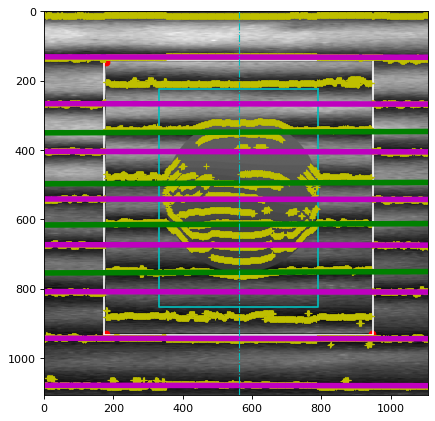

In [40]:
fig = plt.figure(figsize=(6, 6), dpi=80)
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ph.draw_gauge(axes, img_array, drawdata)

In [41]:
bwo, co, ro, bwi, ci, ri, ccen, rcen = fp.gbroif(img_array, xygb)

In [42]:
circle = (330, 290, 820, 780)
mask = Image.new(mode="1", size=img_array.shape)
draw = ImageDraw.Draw(mask)
draw.ellipse(circle, fill="white", outline="white")


In [43]:
mask_array = np.asarray(mask)

In [44]:
pklist_masked = []
for col_num, col in enumerate(drawdata["pklist"]):
    col_list = list(col)
    to_delete = []
    for peak in col_list:
        if mask_array[round(peak), col_num] == 1:
            to_delete.append(peak)
    col_array = np.array([item for item in col_list if item not in to_delete])
    pklist_masked.append(col_array)


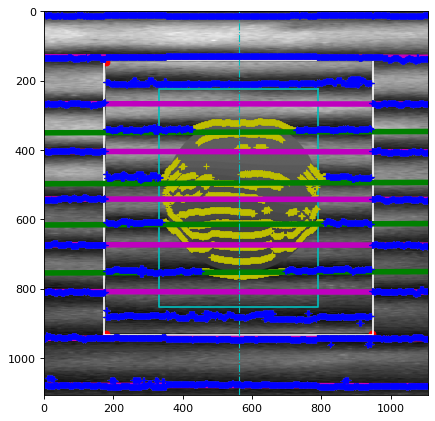

In [45]:
fig = plt.figure(figsize=(6, 6), dpi=80)
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ph.draw_gauge(axes, img_array, drawdata)


for col, peaks in enumerate(pklist_masked):
    x = col * np.ones_like(peaks)
    axes.plot(x, peaks, "+b")

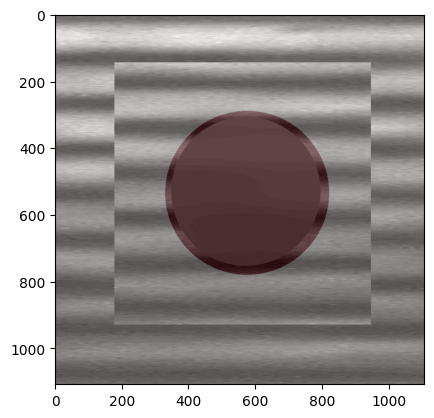

In [46]:
plt.imshow(img_array, cmap=matplotlib.cm.gray)
plt.imshow(mask_array, cmap=matplotlib.cm.Reds, alpha=0.3)